In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

In [89]:
hotel_df = pd.read_csv("hotel_data_country.csv")
hotel_df

,city,country,name,price,rating,vote,distance
0,London,United Kingdom,Hostel Thirty One,SEK 476,Scored 5.3,"2,188 reviews",3.9 km from centre
1,London,United Kingdom,Hostel 165,SEK 484,Scored 6.9,"1,409 reviews",3 km from centre
2,London,United Kingdom,Rio Hostel,SEK 484,Scored 6.7,"1,810 reviews",2.7 km from centre
3,London,United Kingdom,Hostel SOFÍA,SEK 508,Scored 4.8,601 reviews,6.1 km from centre
4,London,United Kingdom,Hostel OASIS,SEK 550,Scored 6.4,131 reviews,4.3 km from centre
5,London,United Kingdom,Hostel sofía,SEK 593,Scored 5.5,"2,504 reviews",6.1 km from centre
6,London,United Kingdom,Habitación Familiar,SEK 593,Scored 6.3,481 reviews,7.5 km from centre
7,London,United Kingdom,Lai Hostel,SEK 667,Scored 5.8,35 reviews,1.1 km from centre
8,London,United Kingdom,Arc House Pop Art,SEK 713,Scored 6.3,546 reviews,1.1 km from centre
9,London,United Kingdom,Madrid Downtown Hostel,SEK 714,Scored 7.0,"4,700 reviews",0.6 km from centre


In [90]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   city      25 non-null     object
 1   country   25 non-null     object
 2   name      25 non-null     object
 3   price     25 non-null     object
 4   rating    25 non-null     object
 5   vote      25 non-null     object
 6   distance  25 non-null     object
dtypes: object(7)
memory usage: 1.5+ KB


In [91]:
# in column "rating": value "Scored 5.9" delete "Scored", change the str type to float type
# in column "vote": value "321 reviews" delete "reviews", change the str type to int
# in column "distance": change column name "distance" to "distance from center(km)", change delete "km from centre", change the str type to float type
# in column "price": price 

hotel_df["rating"] = hotel_df["rating"].apply(lambda x: float(x.split(" ")[1]))
hotel_df["vote"] = hotel_df["vote"].apply(lambda x: int(x.split(" ")[0].replace(",","")))
hotel_df["distance"] = hotel_df["distance"].apply(lambda x: float(x.split(" ")[0]) if x.split(" ")[1]=='km' 
                                      else float(x.split(" ")[0])/1000 if x.split(" ")[1]=='m'
                                      else None)
hotel_df.rename(columns={"distance":"distance from center(km)"},inplace=True)

hotel_df["price"] = hotel_df["price"].apply(lambda x: float(x.split("\xa0")[1]))
hotel_df.rename(columns={"price":"price (SEK)"},inplace=True)


In [92]:
hotel_df

,city,country,name,price (SEK),rating,vote,distance from center(km)
0,London,United Kingdom,Hostel Thirty One,476.0,5.3,2188,3.90
1,London,United Kingdom,Hostel 165,484.0,6.9,1409,3.00
2,London,United Kingdom,Rio Hostel,484.0,6.7,1810,2.70
3,London,United Kingdom,Hostel SOFÍA,508.0,4.8,601,6.10
4,London,United Kingdom,Hostel OASIS,550.0,6.4,131,4.30
5,London,United Kingdom,Hostel sofía,593.0,5.5,2504,6.10
6,London,United Kingdom,Habitación Familiar,593.0,6.3,481,7.50
7,London,United Kingdom,Lai Hostel,667.0,5.8,35,1.10
8,London,United Kingdom,Arc House Pop Art,713.0,6.3,546,1.10
9,London,United Kingdom,Madrid Downtown Hostel,714.0,7.0,4700,0.60


In [ ]:
# a function to transfer distance
def lam(x):
    new = x.split(" ")
    if new[1]  == 'km':
        y = float(new[0])
    elif new[1] == 'm':
        y = float(new[0])/1000

    return y

x="250 m from centre"
lam(x)

In [93]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   city                      25 non-null     object 
 1   country                   25 non-null     object 
 2   name                      25 non-null     object 
 3   price (SEK)               25 non-null     float64
 4   rating                    25 non-null     float64
 5   vote                      25 non-null     int64  
 6   distance from center(km)  25 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.5+ KB


C:\Users\taoti\AppData\Local\Temp\ipykernel_49392\2889701480.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_yticklabels(wrapped_labels)
C:\Users\taoti\AppData\Local\Temp\ipykernel_49392\2889701480.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_yticklabels(wrapped_labels)
C:\Users\taoti\AppData\Local\Temp\ipykernel_49392\2889701480.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_yticklabels(wrapped_labels)
C:\Users\taoti\AppData\Local\Temp\ipykernel_49392\2889701480.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_yticklabels(wrapped_labels)


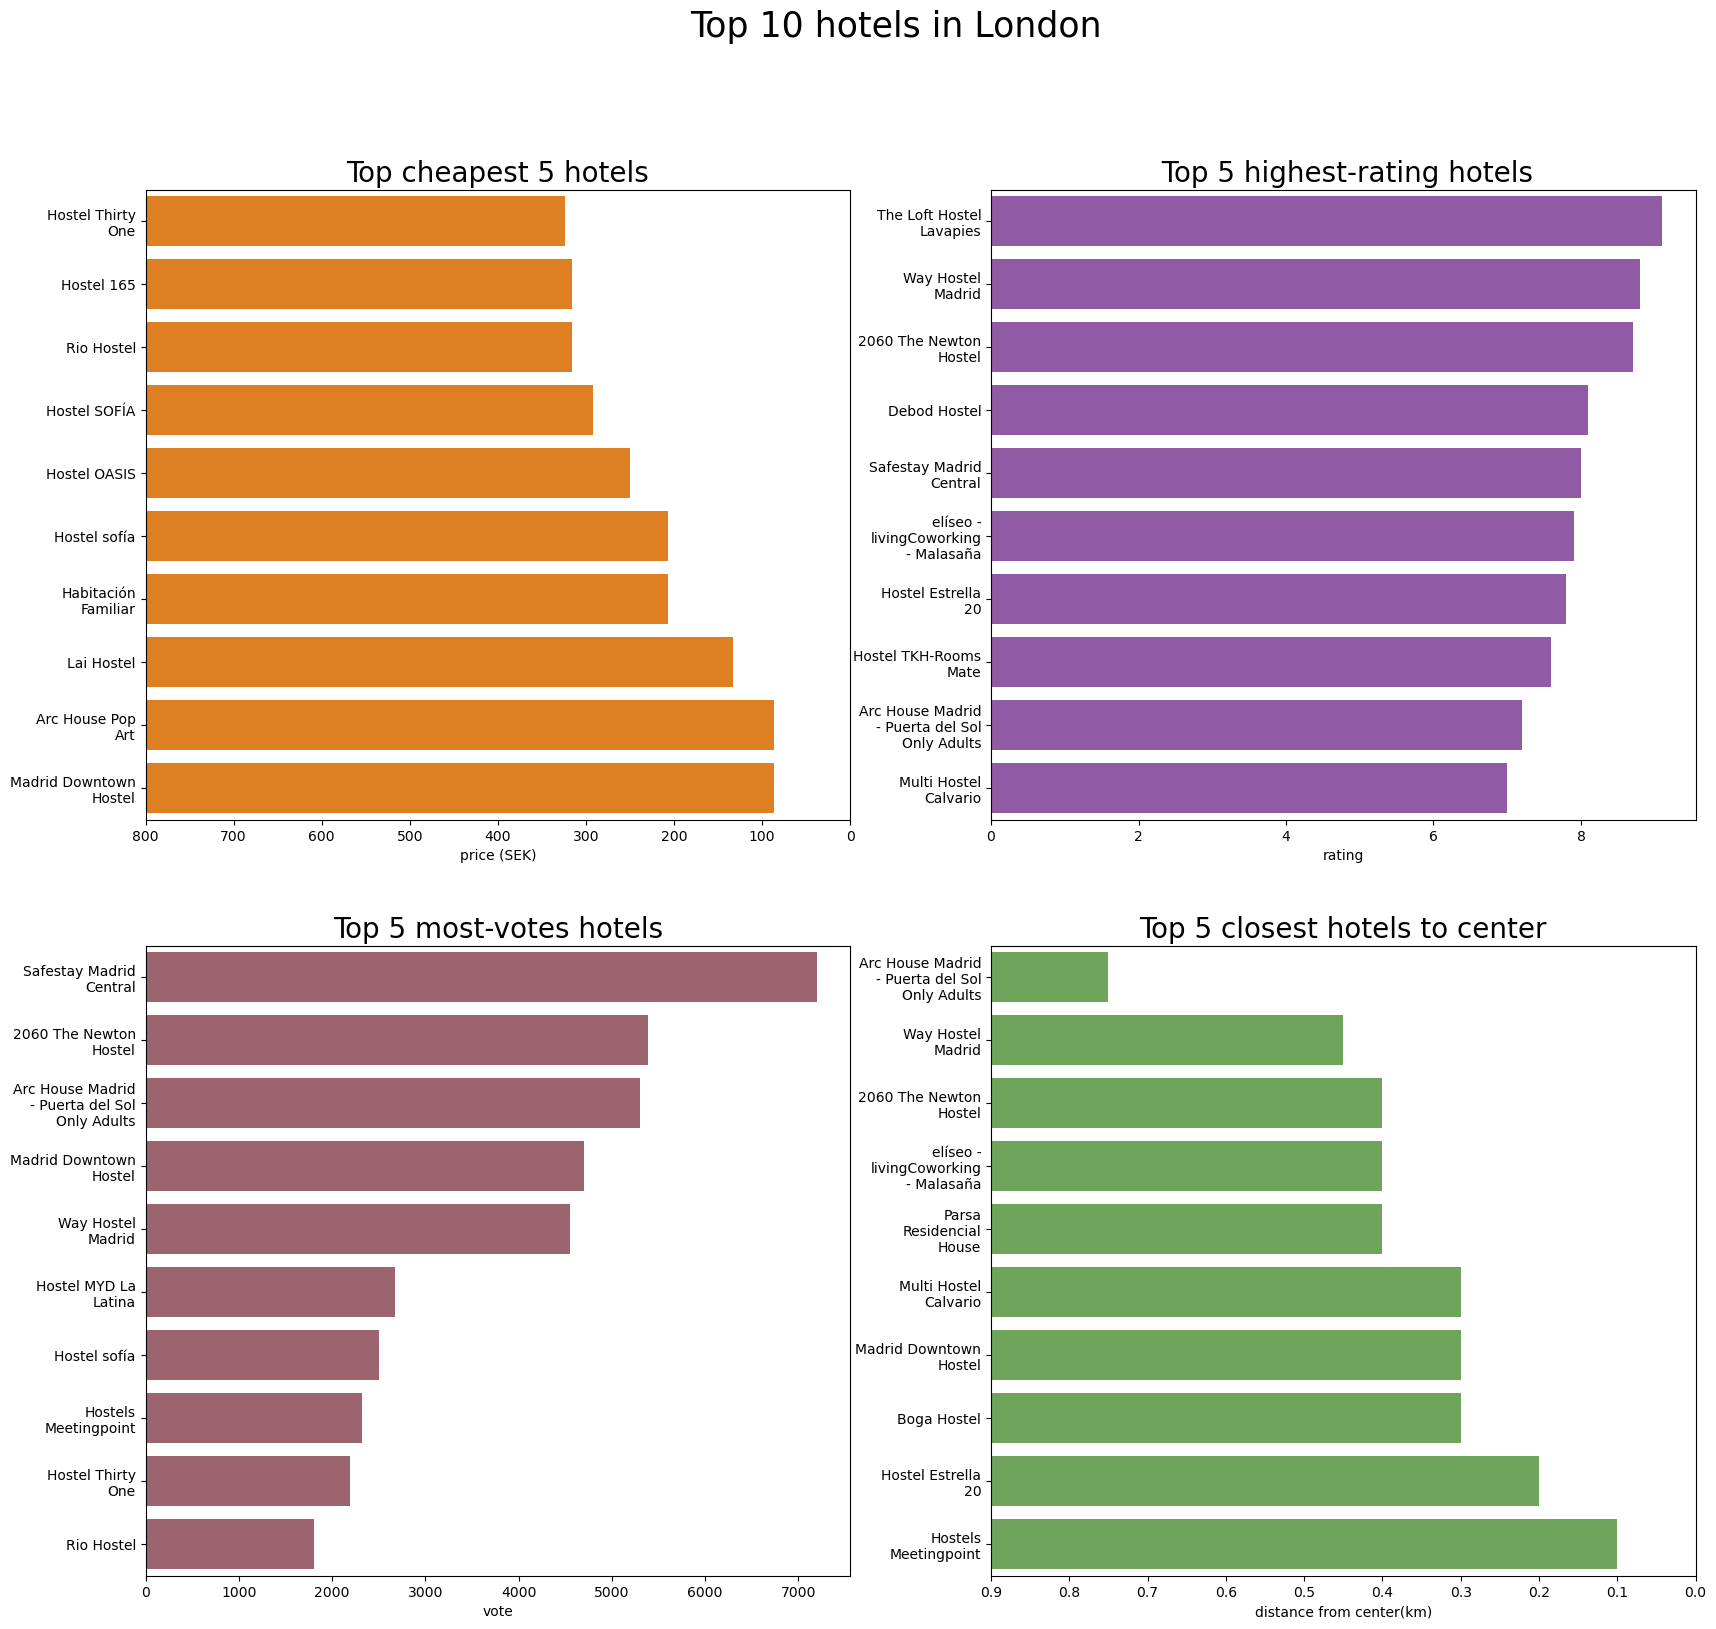

<Figure size 640x480 with 0 Axes>

In [ ]:
# set color
primary_colors = [ "#D83227","#42baa4","#974DB2","#f8ee07","#f90655","#184fe7"]   
secondary_colors = ["#68B24D","#fd7f02","#3e73ba","#d15b9f","#a45b68"]
contrast_colors=["#13d5ec"]

tian_colors = primary_colors + secondary_colors + contrast_colors


# draw a figure
fig,axes = plt.subplots(2,2,figsize=(20,18))

# Top 10 chepest hotels:
hotel_top_10_cheap = hotel_df.sort_values(by="price (SEK)",ascending=True).iloc[:10]
city = hotel_top_10_cheap.loc[0,"city"]
sns.barplot(data=hotel_top_10_cheap,x="price (SEK)",y="name",orient="h",errorbar=None,color=secondary_colors[1],ax=axes[0,0])
axes[0,0].set_title("Top cheapest 5 hotels",fontsize=20)
axes[0,0].set_ylabel("",fontsize=12)

# Get the current x-tick positions
x_ticks = axes[0, 0].get_xticks()
# Reverse the x-tick positions (this keeps the plot direction the same)
axes[0, 0].set_xticks(x_ticks[::-1])
# Get current x-tick labels and reverse them
# get_xticklabels() gives you the actual label objects, 
# so we use get_text() to extract the text (i.e., the labels) from those objects, and then reverse them
x_labels = [label.get_text() for label in axes[0, 0].get_xticklabels()]
axes[0, 0].set_xticklabels(x_labels[::-1])  # Set the reversed labels

# wrap the y-tick lables to 2 lines
lables = axes[0,0].get_yticklabels()
# textwrap.fill(): This function breaks long strings into multiple lines.
# You can adjust the 10 in textwrap.fill(label.get_text(), 10) to set the maximum number of characters per line.
wrapped_labels = [textwrap.fill(label.get_text(),16) for label in lables]
# set_xticklabels(): After wrapping the labels, we set them back to the x-axis with rotation for better readability.
axes[0,0].set_yticklabels(wrapped_labels)

# Top 10 highest-rating hotels:
hotel_top_10_cheap = hotel_df.sort_values(by="rating",ascending=False).iloc[:10]
sns.barplot(data=hotel_top_10_cheap,x="rating",y="name",orient="h",errorbar=None,color=primary_colors[2],ax=axes[0,1])
axes[0,1].set_title(" Top 5 highest-rating hotels",fontsize=20)
axes[0,1].set_ylabel("",fontsize=12)
# wrap the y-tick lables to 2 lines
lables = axes[0,1].get_yticklabels()
# textwrap.fill(): This function breaks long strings into multiple lines.
# You can adjust the 10 in textwrap.fill(label.get_text(), 10) to set the maximum number of characters per line.
wrapped_labels = [textwrap.fill(label.get_text(),16) for label in lables]
# set_yticklabels(): After wrapping the labels, we set them back to the x-axis with rotation for better readability.
axes[0,1].set_yticklabels(wrapped_labels)

# Top 10 most-votes hotels:
hotel_top_10_cheap = hotel_df.sort_values(by="vote",ascending=False).iloc[:10]
sns.barplot(data=hotel_top_10_cheap,x="vote",y="name",orient="h",errorbar=None,color=secondary_colors[4],ax=axes[1,0])
axes[1,0].set_title("Top 5 most-votes hotels",fontsize=20)
axes[1,0].set_ylabel("",fontsize=12)
# wrap the x-tick lables to 2 lines
lables = axes[1,0].get_yticklabels()
# textwrap.fill(): This function breaks long strings into multiple lines.
# You can adjust the 10 in textwrap.fill(label.get_text(), 10) to set the maximum number of characters per line.
wrapped_labels = [textwrap.fill(label.get_text(),16) for label in lables]
# set_xticklabels(): After wrapping the labels, we set them back to the x-axis with rotation for better readability.
axes[1,0].set_yticklabels(wrapped_labels)

# Top 10 closest hotels to center:
hotel_top_10_cheap = hotel_df.sort_values(by="distance from center(km)",ascending=True).iloc[:10]
sns.barplot(data=hotel_top_10_cheap,x="distance from center(km)",y="name",orient="h",errorbar=None,color=secondary_colors[0],ax=axes[1,1])
axes[1,1].set_title("Top 5 closest hotels to center",fontsize=20)
axes[1,1].set_ylabel("",fontsize=12)

# Get the current y-tick positions
x_ticks = axes[1, 1].get_xticks()
# Reverse the y-tick positions (this keeps the plot direction the same)
axes[1, 1].set_xticks(x_ticks[::-1])
# Get current y-tick labels and reverse them
# get_yticklabels() gives you the actual label objects, 
# so we use get_text() to extract the text (i.e., the labels) from those objects, and then reverse them
x_labels = [label.get_text() for label in axes[1, 1].get_xticklabels()]
axes[1, 1].set_xticklabels(x_labels[::-1])  # Set the reversed labels

# wrap the y-tick lables to 2 lines
lables = axes[1,1].get_yticklabels()
# textwrap.fill(): This function breaks long strings into multiple lines.
# You can adjust the 10 in textwrap.fill(label.get_text(), 10) to set the maximum number of characters per line.
wrapped_labels = [textwrap.fill(label.get_text(),16) for label in lables]
# set_yticklabels(): After wrapping the labels, we set them back to the x-axis with rotation for better readability.
axes[1,1].set_yticklabels(wrapped_labels)

plt.suptitle(f"Top 10 hotels in {city}",fontsize=25)

#plt.tight_layout()
plt.show()

plt.savefig("hotel.png", transparent = False, bbox_inches="tight")

C:\Users\taoti\AppData\Local\Temp\ipykernel_49392\3951408304.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(wrapped_labels,rotation=45,ha="center")
C:\Users\taoti\AppData\Local\Temp\ipykernel_49392\3951408304.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(wrapped_labels,rotation=45,ha="center")
C:\Users\taoti\AppData\Local\Temp\ipykernel_49392\3951408304.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(wrapped_labels,rotation=45,ha="center")
C:\Users\taoti\AppData\Local\Temp\ipykernel_49392\3951408304.py:85: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].

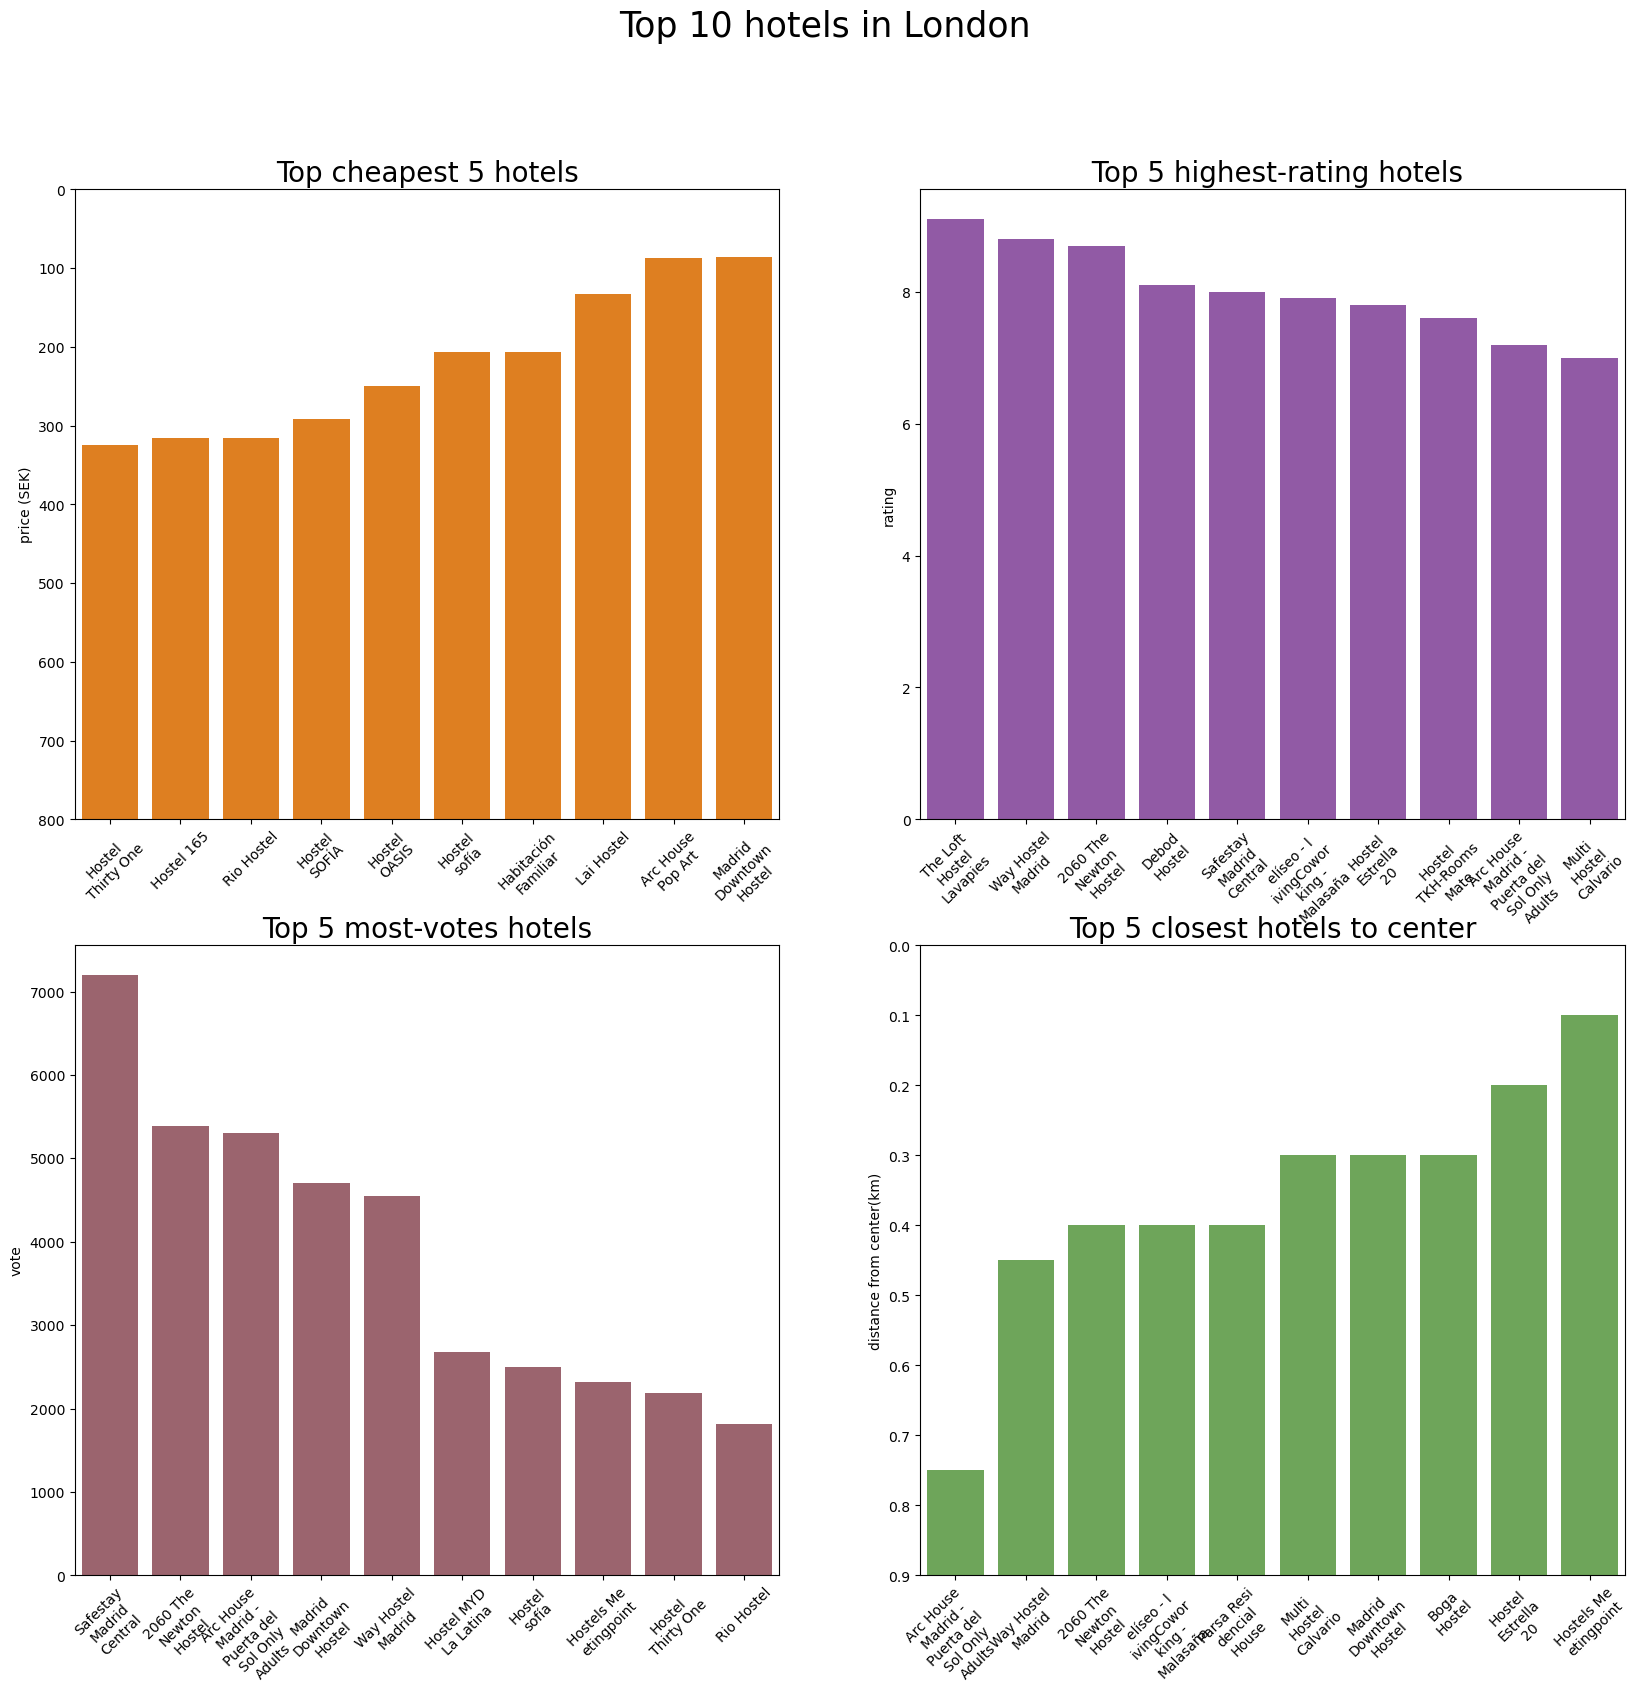

In [ ]:
# set color
primary_colors = [ "#D83227","#42baa4","#974DB2","#f8ee07","#f90655","#184fe7"]   
secondary_colors = ["#68B24D","#fd7f02","#3e73ba","#d15b9f","#a45b68"]
contrast_colors=["#13d5ec"]

tian_colors = primary_colors + secondary_colors + contrast_colors


# draw a figure
fig,axes = plt.subplots(2,2,figsize=(20,18))

# Top 10 chepest hotels:
hotel_top_10_cheap = hotel_df.sort_values(by="price (SEK)",ascending=True).iloc[:10]
city = hotel_top_10_cheap.loc[0,"city"]
sns.barplot(data=hotel_top_10_cheap,x="name",y="price (SEK)",errorbar=None,color=secondary_colors[1],ax=axes[0,0])
axes[0,0].set_title("Top cheapest 5 hotels",fontsize=20)
axes[0,0].set_xlabel("",fontsize=12)

# Get the current y-tick positions
y_ticks = axes[0, 0].get_yticks()
# Reverse the y-tick positions (this keeps the plot direction the same)
axes[0, 0].set_yticks(y_ticks[::-1])
# Get current y-tick labels and reverse them
# get_yticklabels() gives you the actual label objects, 
# so we use get_text() to extract the text (i.e., the labels) from those objects, and then reverse them
y_labels = [label.get_text() for label in axes[0, 0].get_yticklabels()]
axes[0, 0].set_yticklabels(y_labels[::-1])  # Set the reversed labels

# wrap the x-tick lables to 2 lines
lables = axes[0,0].get_xticklabels()
# textwrap.fill(): This function breaks long strings into multiple lines.
# You can adjust the 10 in textwrap.fill(label.get_text(), 10) to set the maximum number of characters per line.
wrapped_labels = [textwrap.fill(label.get_text(),16) for label in lables]
# set_xticklabels(): After wrapping the labels, we set them back to the x-axis with rotation for better readability.
axes[0,0].set_xticklabels(wrapped_labels,rotation=45,ha="center")

# Top 10 highest-rating hotels:
hotel_top_10_cheap = hotel_df.sort_values(by="rating",ascending=False).iloc[:10]
sns.barplot(data=hotel_top_10_cheap,x="name",y="rating",errorbar=None,color=primary_colors[2],ax=axes[0,1])
axes[0,1].set_title(" Top 5 highest-rating hotels",fontsize=20)
axes[0,1].set_xlabel("",fontsize=12)
# wrap the x-tick lables to 2 lines
lables = axes[0,1].get_xticklabels()
# textwrap.fill(): This function breaks long strings into multiple lines.
# You can adjust the 10 in textwrap.fill(label.get_text(), 10) to set the maximum number of characters per line.
wrapped_labels = [textwrap.fill(label.get_text(),16) for label in lables]
# set_xticklabels(): After wrapping the labels, we set them back to the x-axis with rotation for better readability.
axes[0,1].set_xticklabels(wrapped_labels,rotation=45,ha="center")

# Top 10 most-votes hotels:
hotel_top_10_cheap = hotel_df.sort_values(by="vote",ascending=False).iloc[:10]
sns.barplot(data=hotel_top_10_cheap,x="name",y="vote",errorbar=None,color=secondary_colors[4],ax=axes[1,0])
axes[1,0].set_title("Top 5 most-votes hotels",fontsize=20)
axes[1,0].set_xlabel("",fontsize=12)
# wrap the x-tick lables to 2 lines
lables = axes[1,0].get_xticklabels()
# textwrap.fill(): This function breaks long strings into multiple lines.
# You can adjust the 10 in textwrap.fill(label.get_text(), 10) to set the maximum number of characters per line.
wrapped_labels = [textwrap.fill(label.get_text(),16) for label in lables]
# set_xticklabels(): After wrapping the labels, we set them back to the x-axis with rotation for better readability.
axes[1,0].set_xticklabels(wrapped_labels,rotation=45,ha="center")

# Top 10 closest hotels to center:
hotel_top_10_cheap = hotel_df.sort_values(by="distance from center(km)",ascending=True).iloc[:10]
sns.barplot(data=hotel_top_10_cheap,x="name",y="distance from center(km)",errorbar=None,color=secondary_colors[0],ax=axes[1,1])
axes[1,1].set_title("Top 5 closest hotels to center",fontsize=20)
axes[1,1].set_xlabel("",fontsize=12)

# Get the current y-tick positions
y_ticks = axes[1, 1].get_yticks()
# Reverse the y-tick positions (this keeps the plot direction the same)
axes[1, 1].set_yticks(y_ticks[::-1])
# Get current y-tick labels and reverse them
# get_yticklabels() gives you the actual label objects, 
# so we use get_text() to extract the text (i.e., the labels) from those objects, and then reverse them
y_labels = [label.get_text() for label in axes[1, 1].get_yticklabels()]
axes[1, 1].set_yticklabels(y_labels[::-1])  # Set the reversed labels

# wrap the x-tick lables to 2 lines
lables = axes[1,1].get_xticklabels()
# textwrap.fill(): This function breaks long strings into multiple lines.
# You can adjust the 10 in textwrap.fill(label.get_text(), 10) to set the maximum number of characters per line.
wrapped_labels = [textwrap.fill(label.get_text(),16) for label in lables]
# set_xticklabels(): After wrapping the labels, we set them back to the x-axis with rotation for better readability.
axes[1,1].set_xticklabels(wrapped_labels,rotation=45,ha="center")

plt.suptitle(f"Top 10 hotels in {city}",fontsize=25)

#plt.tight_layout()
plt.show()

plt.savefig("hotel.png")